In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/parsarangriz/Downloads/Data_XY.csv")

In [3]:
x = data.iloc[:,:4186] #features
y = data['y'] # y ( h in our model)
x = np.array(x)

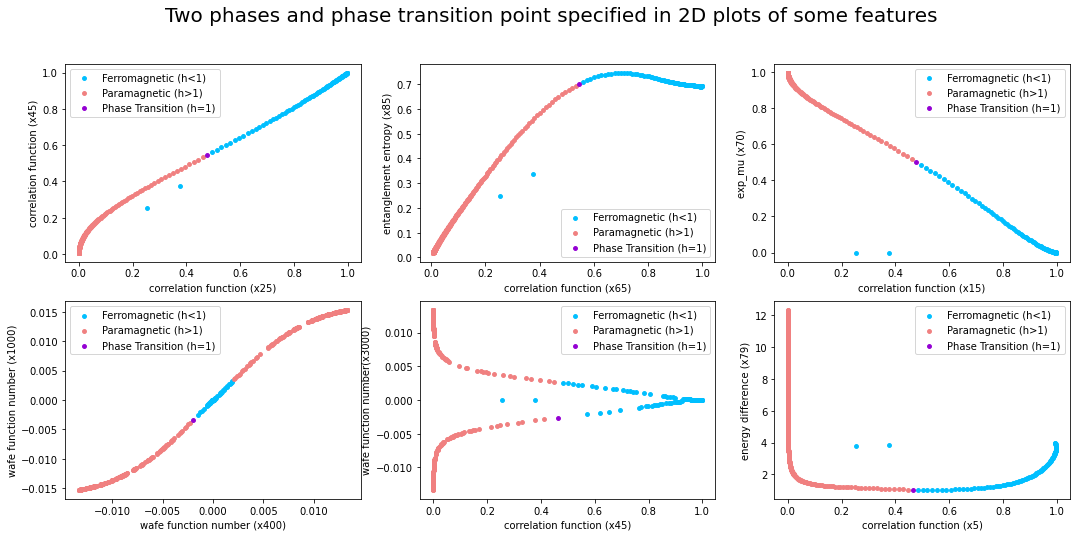

In [4]:
#two classes
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

axes[0][0].scatter(x[y < 1][:,24], x[y < 1][:,39], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][0].scatter(x[y > 1][:,24], x[y > 1][:,39], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][0].scatter(x[y == 1][:,24], x[y == 1][:,39], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][0].legend()
axes[0][0].set_xlabel('correlation function (x25)')
axes[0][0].set_ylabel('correlation function (x45)')
##
axes[1][0].scatter(x[y < 1][:,399], x[y < 1][:,999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][0].scatter(x[y > 1][:,399], x[y > 1][:,999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][0].scatter(x[y == 1][:,399], x[y == 1][:,999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][0].legend()
axes[1][0].set_xlabel('wafe function number (x400)')
axes[1][0].set_ylabel('wafe function number (x1000)')
##
axes[0][1].scatter(x[y < 1][:,64], x[y < 1][:,84], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][1].scatter(x[y > 1][:,64], x[y > 1][:,84], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][1].scatter(x[y == 1][:,64], x[y == 1][:,84], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][1].legend()
axes[0][1].set_xlabel('correlation function (x65)')
axes[0][1].set_ylabel('entanglement entropy (x85)')
##
axes[1][1].scatter(x[y < 1][:,44], x[y < 1][:,2999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][1].scatter(x[y > 1][:,44], x[y > 1][:,2999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][1].scatter(x[y == 1][:,44], x[y == 1][:,2999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][1].legend()
axes[1][1].set_xlabel('correlation function (x45)')
axes[1][1].set_ylabel('wafe function number(x3000)')
axes[0][2].scatter(x[y < 1][:,14], x[y < 1][:,69], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][2].scatter(x[y > 1][:,14], x[y > 1][:,69], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][2].scatter(x[y == 1][:,14], x[y == 1][:,69], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][2].legend()
axes[0][2].set_xlabel('correlation function (x15)')
axes[0][2].set_ylabel('exp_mu (x70)')
axes[1][2].scatter(x[y < 1][:,4], x[y < 1][:,78], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][2].scatter(x[y > 1][:,4], x[y > 1][:,78], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][2].scatter(x[y == 1][:,4], x[y == 1][:,78], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][2].legend()
axes[1][2].set_xlabel('correlation function (x5)')
axes[1][2].set_ylabel('energy difference (x79)')
fig.suptitle(r"Two phases and phase transition point specified in 2D plots of some features",fontsize = 20)
plt.savefig('Two classes.jpg',dpi=500)

In [5]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)  

# Model 3: KRR

In [6]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge()

In [7]:
%%time
KRR.fit(x_train,y_train)

CPU times: user 282 ms, sys: 33.6 ms, total: 316 ms
Wall time: 65.6 ms


KernelRidge()

In [8]:
%%time
y_pred_KRR = KRR.predict(x_test)

CPU times: user 141 ms, sys: 9.53 ms, total: 151 ms
Wall time: 35.4 ms


In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
##
MSEScore = mean_squared_error(y_test,y_pred_KRR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KRR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KRR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KRR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.002747119989804618

r^2 metric: 0.9993254056278034

root mean squared_error metric: 0.05241297539545545

mean absolute error metric: 0.034090417772766474


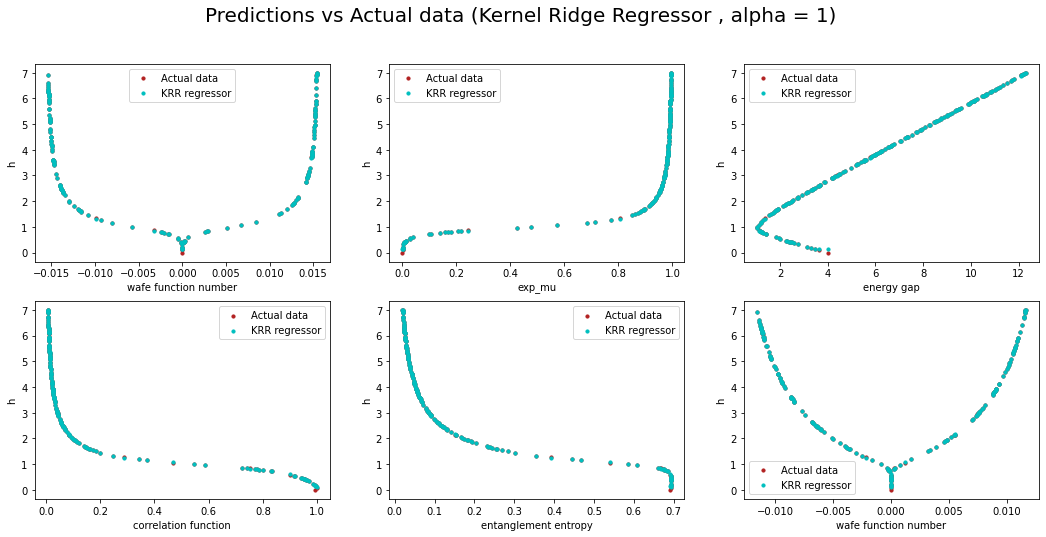

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (Kernel Ridge Regressor , alpha = 1)",fontsize = 20)
plt.savefig('true_pred_krr.jpg',dpi=500)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.3s finished


CPU times: user 29.8 s, sys: 2.43 s, total: 32.3 s
Wall time: 4.93 s


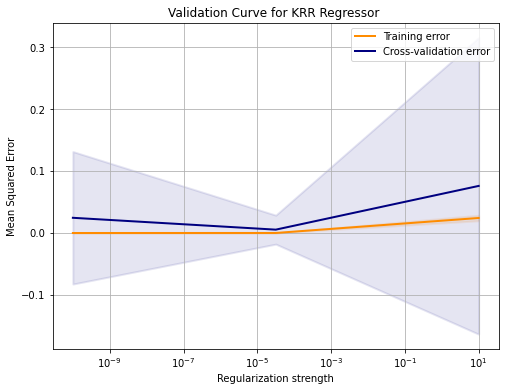

In [11]:
%%time
from sklearn.model_selection import validation_curve
k_list = np.logspace(-10, 1, 3)
train_scores, test_scores = validation_curve(KernelRidge(), x, y, 
                                              param_name="alpha",
                                              param_range= k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.title("Validation Curve for KRR Regressor ")
plt.xlabel(r"Regularization strength")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(k_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(k_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(k_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('krr_validation curve.jpg',dpi=500)

In [44]:
from sklearn.model_selection import GridSearchCV
params = [{'kernel': ['laplacian'],
                     'alpha': [1*1e-5, 2*1e-5, 3*1e-5, 4*1e-5, 5*1e-5, 6*1e-5, 7*1e-5, 8*1e-5, 9*1e-5]}]
krr = KernelRidge()
krr_gs = GridSearchCV(krr, param_grid=params, cv=10, scoring='neg_mean_squared_error')
krr_gs.fit(x_train, y_train)
print("Best Number of Regularization strength found on development set:")
print()
print( krr_gs.best_params_ )

Best Number of Regularization strength found on development set:

{'alpha': 1e-05, 'kernel': 'laplacian'}


In [16]:
def plot_learning_curve(estimator, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(30,10))

    axes[0].set_title("Learning Curve")
    
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Mean Squared Error")


    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring = 'neg_mean_squared_error',
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training error")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation error")
    axes[0].legend(loc="best")


    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit times (s)")
    axes[1].set_title("Scalability of the model")


    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit times (s)")
    axes[2].set_ylabel("Mean Squared Error")
    axes[2].set_title("Performance of the model")


    return plt

CPU times: user 1min 47s, sys: 11.4 s, total: 1min 58s
Wall time: 19.2 s


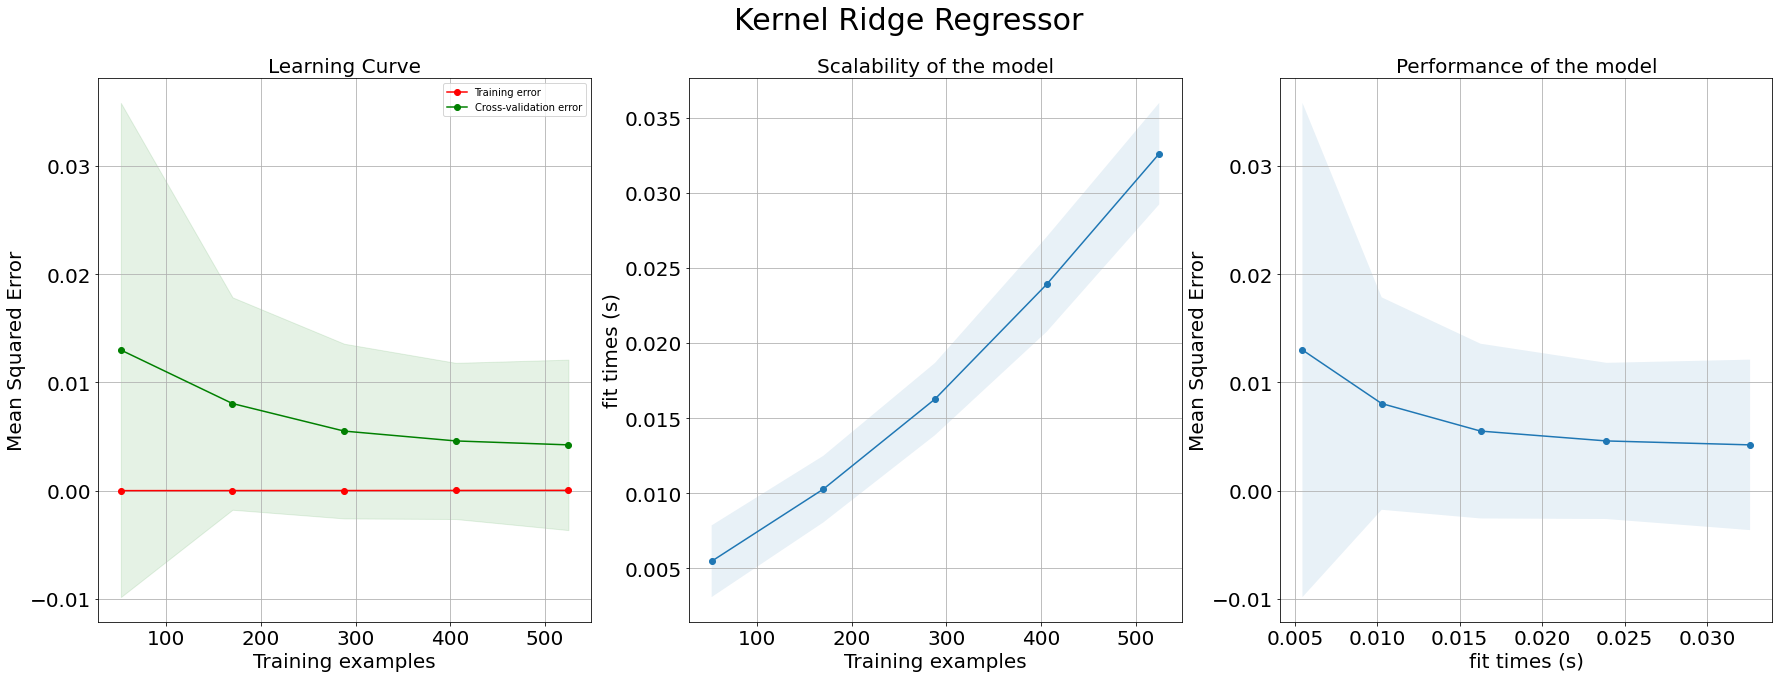

In [36]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = KernelRidge(1e-5)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Kernel Ridge Regressor",fontsize=30)
plt.savefig('krr_learning_curves.jpg',dpi=500)

In [19]:
KRR = KernelRidge(alpha=1e-5)

In [20]:
%%time
KRR.fit(x_train,y_train)

CPU times: user 185 ms, sys: 11.6 ms, total: 197 ms
Wall time: 40.4 ms


KernelRidge(alpha=1e-05)

In [21]:
%%time
y_pred_KRR = KRR.predict(x_test)

CPU times: user 138 ms, sys: 11.2 ms, total: 149 ms
Wall time: 34.8 ms


In [22]:
MSEScore = mean_squared_error(y_test,y_pred_KRR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KRR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KRR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KRR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.00010734659042110988

r^2 metric: 0.9999736395184625

root mean squared_error metric: 0.010360819968569567

mean absolute error metric: 0.0025376695470252157


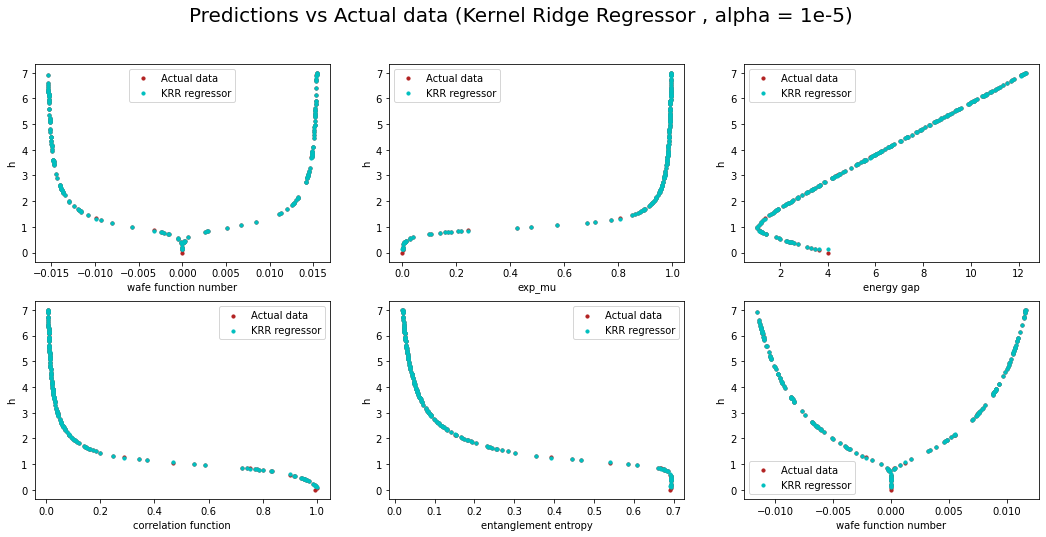

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KRR,s=10, label="KRR regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (Kernel Ridge Regressor , alpha = 1e-5)",fontsize = 20)
plt.savefig('true_pred_krr.jpg',dpi=500)

# Model 3: Linear Regressor

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [49]:
%%time
LR.fit(x_train,y_train)

CPU times: user 820 ms, sys: 73.9 ms, total: 894 ms
Wall time: 143 ms


LinearRegression()

In [50]:
%%time
y_pred_LR = LR.predict(x_test)

CPU times: user 4.21 ms, sys: 5.79 ms, total: 10 ms
Wall time: 6.79 ms


In [51]:
MSEScore = mean_squared_error(y_test, y_pred_LR)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_LR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_LR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_LR)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 5.694191637720558

r^2 metric: -0.3982897169659614

root mean squared_error metric: 2.3862505395956557

mean absolute error metric: 0.18401491272665427


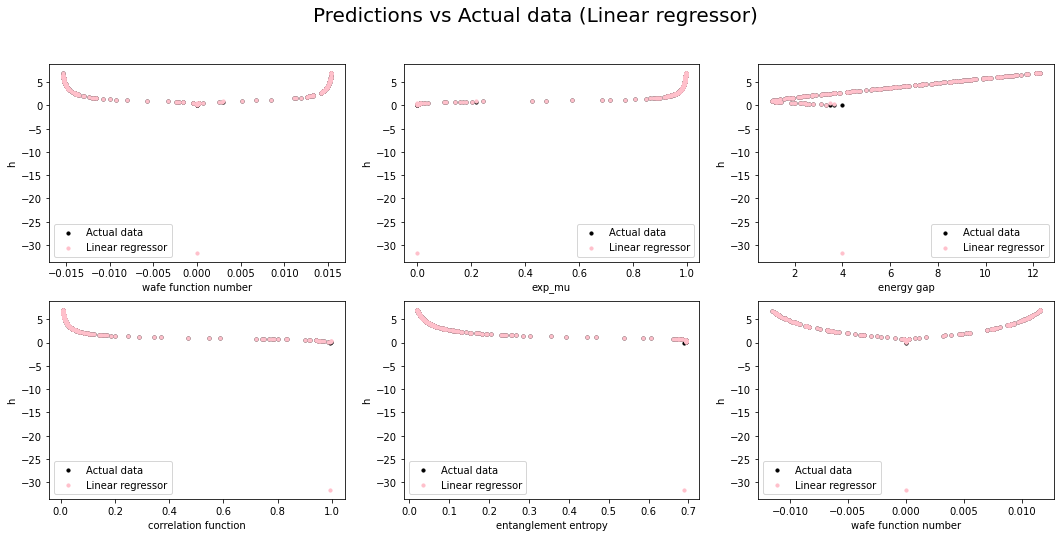

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='black')
axes[0][0].scatter(x_test[:,300],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='black')
axes[1][0].scatter(x_test[:,20],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='black')
axes[0][1].scatter(x_test[:,70],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='black')
axes[1][1].scatter(x_test[:,88],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='black')
axes[0][2].scatter(x_test[:,78],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='black')
axes[1][2].scatter(x_test[:,3500],y_pred_LR,s=10, label="Linear regressor", c = 'pink')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (Linear regressor)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_lr.jpg',dpi=500)

CPU times: user 3min 25s, sys: 22.9 s, total: 3min 48s
Wall time: 33.7 s


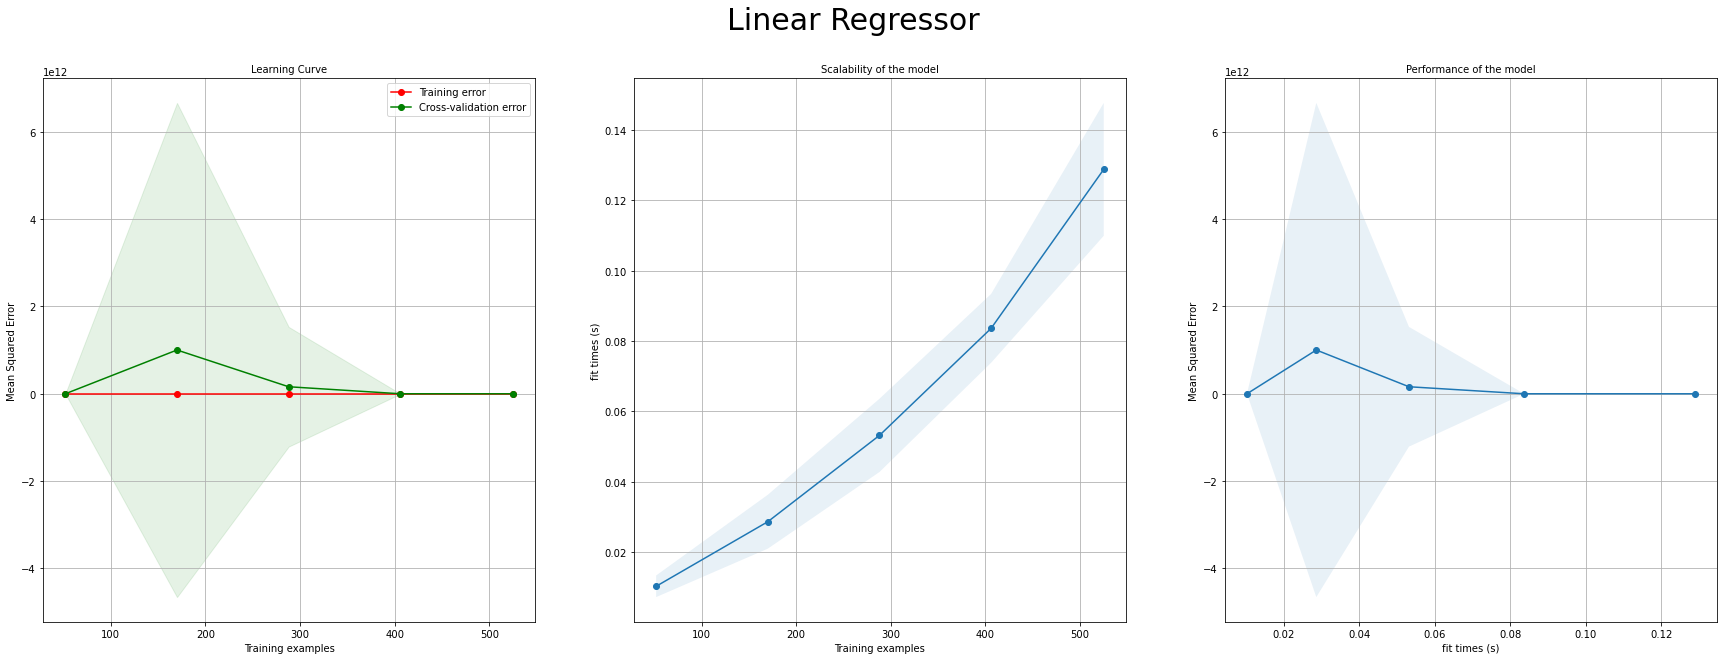

In [56]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Linear Regressor",fontsize=30)
plt.savefig('LR_learning_curves.jpg',dpi=500)